In [15]:
from src.functions.compute_angular_profiles import compute_angular_profiles
from src.functions.langevin_gillespie import langevin_gillespie
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
# Step One: Initialize Parameters
# Elastic Constants
kappa = 56  # pN.nm/rad^2
ktrap = 240  # pN.nm/rad^2

# Thermal Energy at room temperature
kBT = 4.14  # pN.nm

# Unknown Parameters
r = 19  # nm - distance from the rotational axis to the center of the sphere
a = 20  # nm - radius of a sphere (See https://en.wikipedia.org/wiki/Stokes_flow)

# Viscosity and drag terms for rotational friction
eta = 1e-9  # pN.s/nm^2
gammaB = 8 * math.pi * eta * math.pow(a, 3) + 6 * math.pi * eta * a * math.pow(r, 2)  # Rotational drag: spin + offset from axis

# Angles
th1 = 0

# Simulation Parameters
nSim = 500  # Number of simulations
dur = 120  # Steps per simulation
dt = 1e-6  # Step size (s)

pos = np.sqrt(kBT / (10 * kappa)) * np.random.randn(nSim) + th1

method = "heun"

np.random.seed(42)  # Set Seed for reproducibility

In [ ]:
# Step Two: Langevin - Gillespie // Get Data
pos_store, state_store, theta_store = langevin_gillespie(nSim, dur, dt, pos, gammaB, kappa, kBT, method)

In [18]:
profile, jump_pdf, profile_coarse, jump_pdf_coarse = compute_angular_profiles(dt, pos_store, state_store)  # Step 2a: Angular Profiles

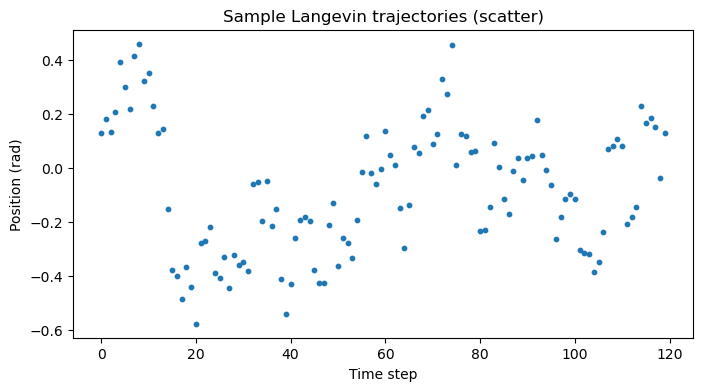

In [ ]:
# Step Three: Visualize Data
plt.figure(figsize=(8, 4))
time = np.arange(pos_store.shape[0])  # time steps
for k in range(min(1, nSim)):
    plt.scatter(
        time,
        pos_store[:, k],
        s=10,
        alpha=1,
    )
plt.xlabel("Time step")
plt.ylabel("Position (rad)")
plt.title("Sample Langevin trajectories (scatter)");

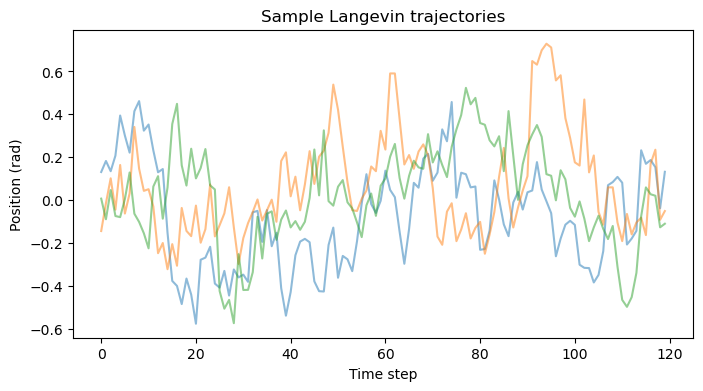

In [28]:
plt.figure(figsize=(8, 4))
for k in range(min(3, nSim)):
    plt.plot(pos_store[:, k], alpha=0.5)
plt.xlabel("Time step")
plt.ylabel("Position (rad)")
plt.title("Sample Langevin trajectories");

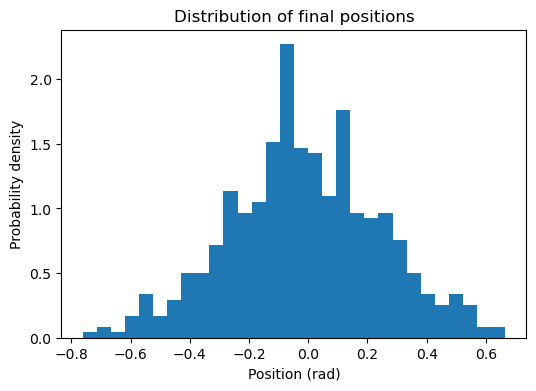

In [21]:
plt.figure(figsize=(6, 4))
plt.hist(pos_store[-1, :], bins=30, density=True)
plt.xlabel("Position (rad)")
plt.ylabel("Probability density")
plt.title("Distribution of final positions");


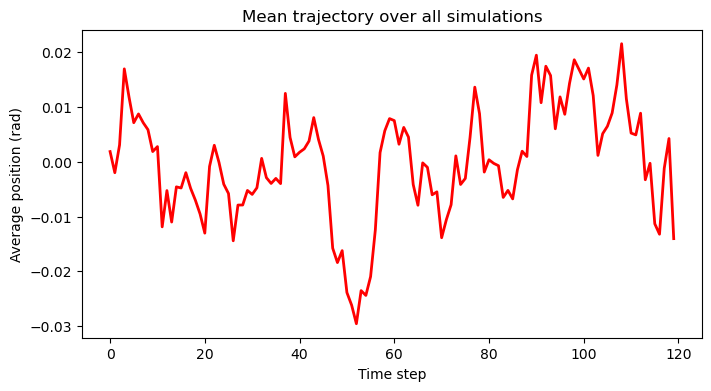

In [26]:
mean_pos = pos_store.mean(axis=1)

plt.figure(figsize=(8, 4))
plt.plot(mean_pos, color="red", linewidth=2)
plt.xlabel("Time step")
plt.ylabel("Average position (rad)")
plt.title("Mean trajectory over all simulations");

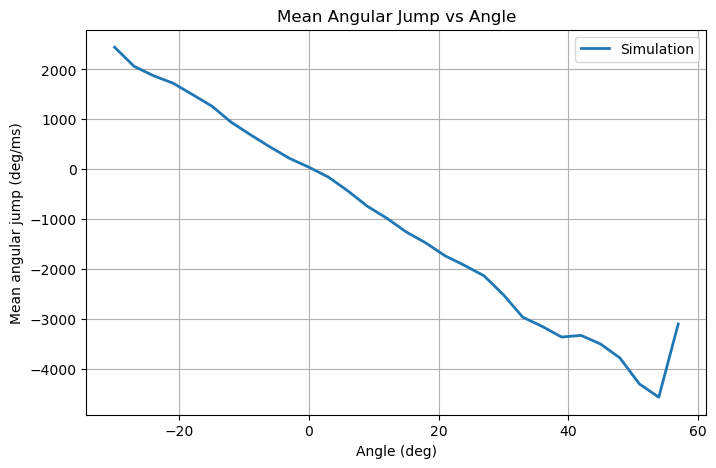

In [ ]:
plt.figure(figsize=(8, 5))

# Use the coarse profile for smoother line
plt.plot(profile_coarse[:, 0], profile_coarse[:, 1], label="Simulation", linewidth=2)

plt.xlabel("Angle (deg)")
plt.ylabel("Mean angular jump (deg/ms)")
plt.title("Mean Angular Jump vs Angle")
plt.legend()
plt.grid(True)